<a href="https://colab.research.google.com/github/Manojpatil123/Machine-learning-Assignments/blob/main/Assignment_Bias_Variance_Tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## <b>MEDV is the dependent variable.

## Fit polynomial regression on this dataset for degrees 1 to 10. To do such a regression, consider only one variable and then run polynomial fit and plot the train and test errors w.r.t model complexity. You can also repeat this experiment for all the other variables. Also do not use <code>np.polyfit</code>function, but use the <code>LinearRegression()</code> using the scikit-learn library.</b>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv("/content/drive/MyDrive/data/housing.csv")
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [8]:
list_of_string=df.iloc[:,0]

In [10]:
a=[]
for i in range(len(list_of_string)):
   a.append(map(float, list_of_string[i].split( )))

In [11]:
df1=pd.DataFrame(a, columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

In [12]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


In [21]:
dependent_variable = 'MEDV'
independent_variables = list(set(df1.columns.tolist()) - {dependent_variable})

In [22]:
independent_variables

['DIS',
 'CHAS',
 'B',
 'ZN',
 'TAX',
 'INDUS',
 'RAD',
 'RM',
 'CRIM',
 'AGE',
 'NOX',
 'PTRATIO',
 'LSTAT']

In [23]:
def create_polynomial_regression_model():
  "Creates a polynomial regression model for the given degree"
  fig, axs = plt.subplots(5, 3,figsize=(15, 30))
  # j and k is for iterating through axis in subplot
  j=0
  k=-1
  #iterating through each feature variable in data set
  for i in independent_variables:
    #setting title for plot
    title=i

    #Create the independent variable data
    X = df1[i].values
    #reshaping it
    X = np.array(X).reshape((len(X), 1))

    # Create the dependent variable data
    y = df1[dependent_variable].values

    #splitting data into train and test

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

    degree=1

    train_error_list=[] #store training error for each degree 
    test_error_list=[] #store testing error for each degree
    degree_list=[1,2,3,4,5,6,7,8,9,10] #storing all the degrees


    #iterating through each degree
    while degree<=10:
      poly_features = PolynomialFeatures(degree=degree)
      
      # transforms the existing features to higher degree features.
      X_train_poly = poly_features.fit_transform(X_train)
      
      # fit the transformed features to Linear Regression
      poly_model = LinearRegression()
      poly_model.fit(X_train_poly, Y_train)
      
      # predicting on training data-set
      y_train_predicted = poly_model.predict(X_train_poly)
      
      # predicting on test data-set
      y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
      
      # evaluating the model on training dataset
      rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
      train_error_list.append(rmse_train)
      
      # evaluating the model on test dataset
      rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
      test_error_list.append(rmse_test)
      degree+=1
    # Updating j and k for plotting on subplot  
    k+=1
    if k>2:
      k=0
      j+=1
    axs[j,k].plot(degree_list,train_error_list,color='green',label='Train_Error')
    axs[j,k].plot(degree_list,test_error_list,color='red',linestyle='--',linewidth=1.0,label='Test_Error')
    axs[j,k].set_title(title)
    axs[j,k].legend()
  for ax in axs.flat:
    ax.set(xlabel='Model Complexity', ylabel='RMSE')


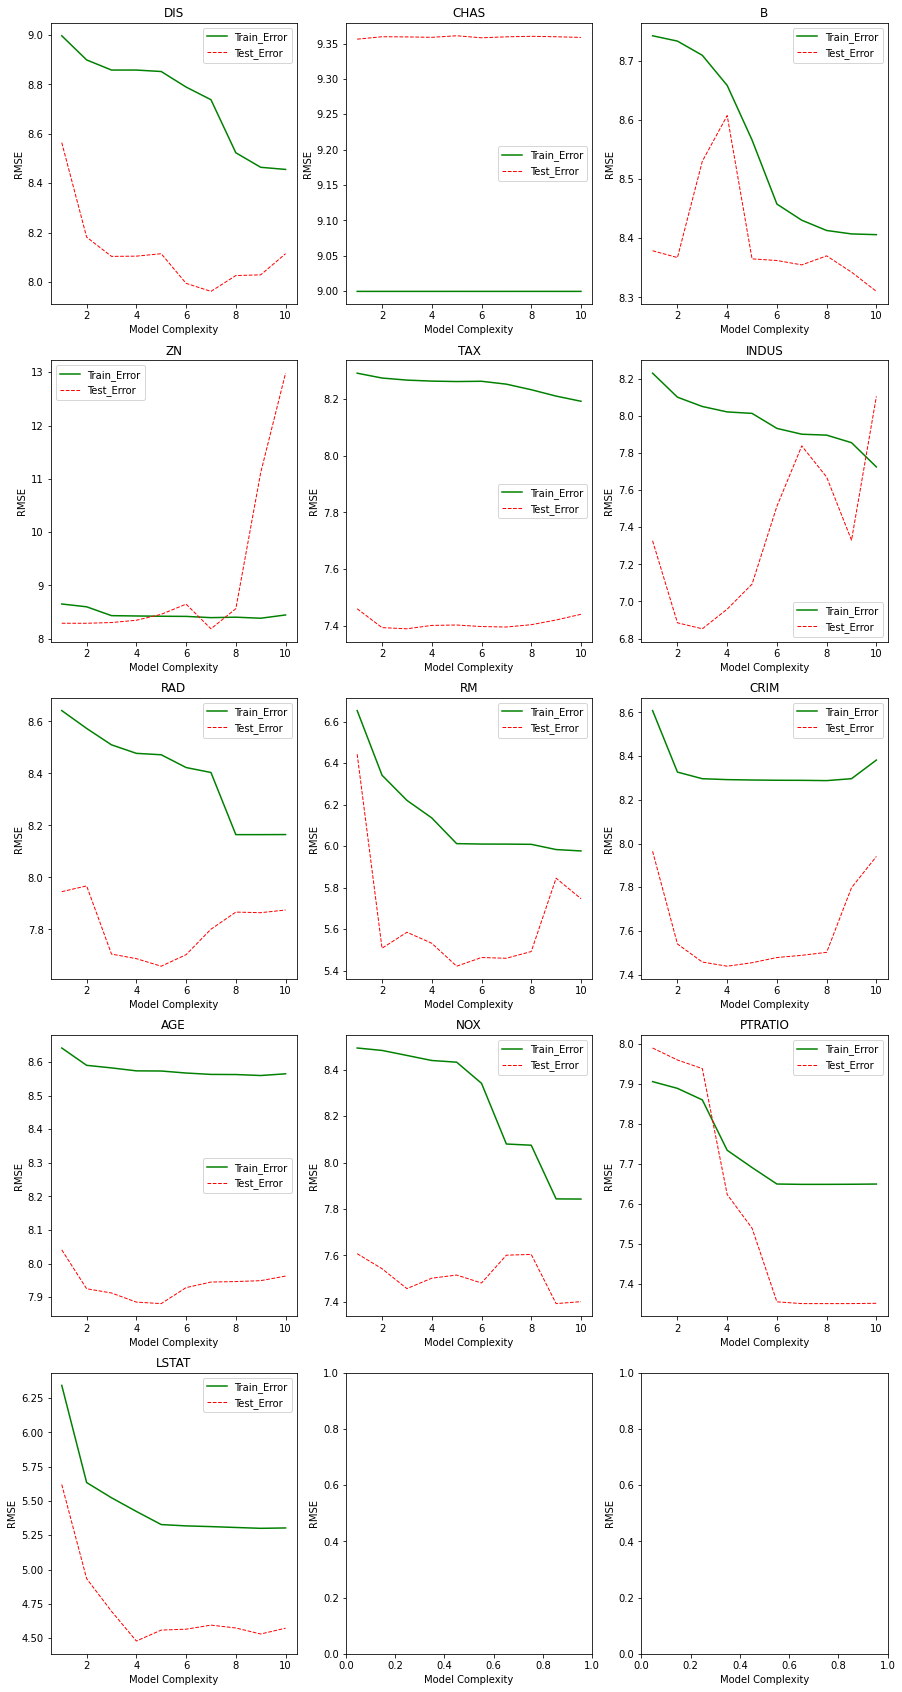

In [24]:
create_polynomial_regression_model()